In [14]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact
import wave

In [9]:
%matplotlib notebook

In [17]:
#set up "continuous" time
realTime = np.linspace(0, 1, 100000)
signalFreq = 261
inputSignal = np.sin(2 * np.pi * signalFreq * realTime)

<IPython.core.display.Javascript object>


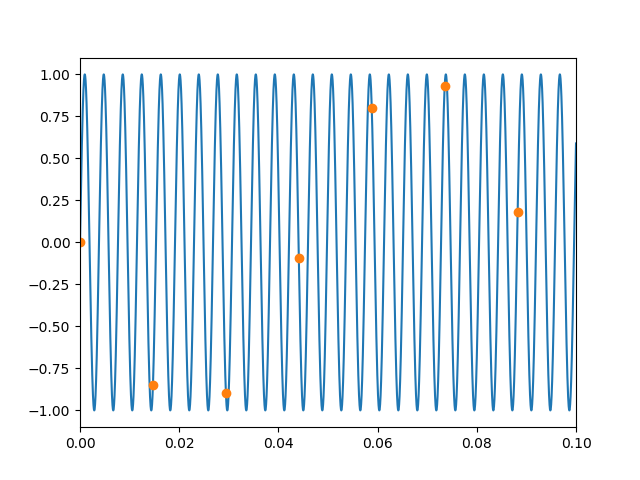

interactive(children=(IntSlider(value=1000, description='sampleFreq', max=3000, min=-1000), Output()), _dom_cl…

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(realTime, inputSignal)
dots, = ax.plot(sampleTime, sampledSignal, 'o')
ax.set_xlim(0,0.1)

def update(sampleFreq=1000):
    sampleTime = np.arange(0, 1, 1/sampleFreq)
    sampledSignal = np.sin(2 * np.pi * signalFreq * sampleTime)
    dots.set_xdata(sampleTime)
    dots.set_ydata(sampledSignal)
    fig.canvas.draw_idle()

interact(update);

In [63]:
def makeAudio(freq=500):
    sampleFreq = 3000 # sample rate
    T = 2.0    # seconds
    t = np.linspace(0, T, int(T * sampleFreq), endpoint=False) # time variable
    sampledSignal = 0.5 * np.sin(2 * np.pi * freq * t)                
    ipd.display(ipd.Audio(sampledSignal, rate=sampleFreq))


In [65]:
interact(makeAudio, freq=(200, 3000));

interactive(children=(IntSlider(value=500, description='freq', max=3000, min=200), Output()), _dom_classes=('w…